In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline
%load_ext autoreload
%autoreload 1

%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
matplotlib.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic')

In [3]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)

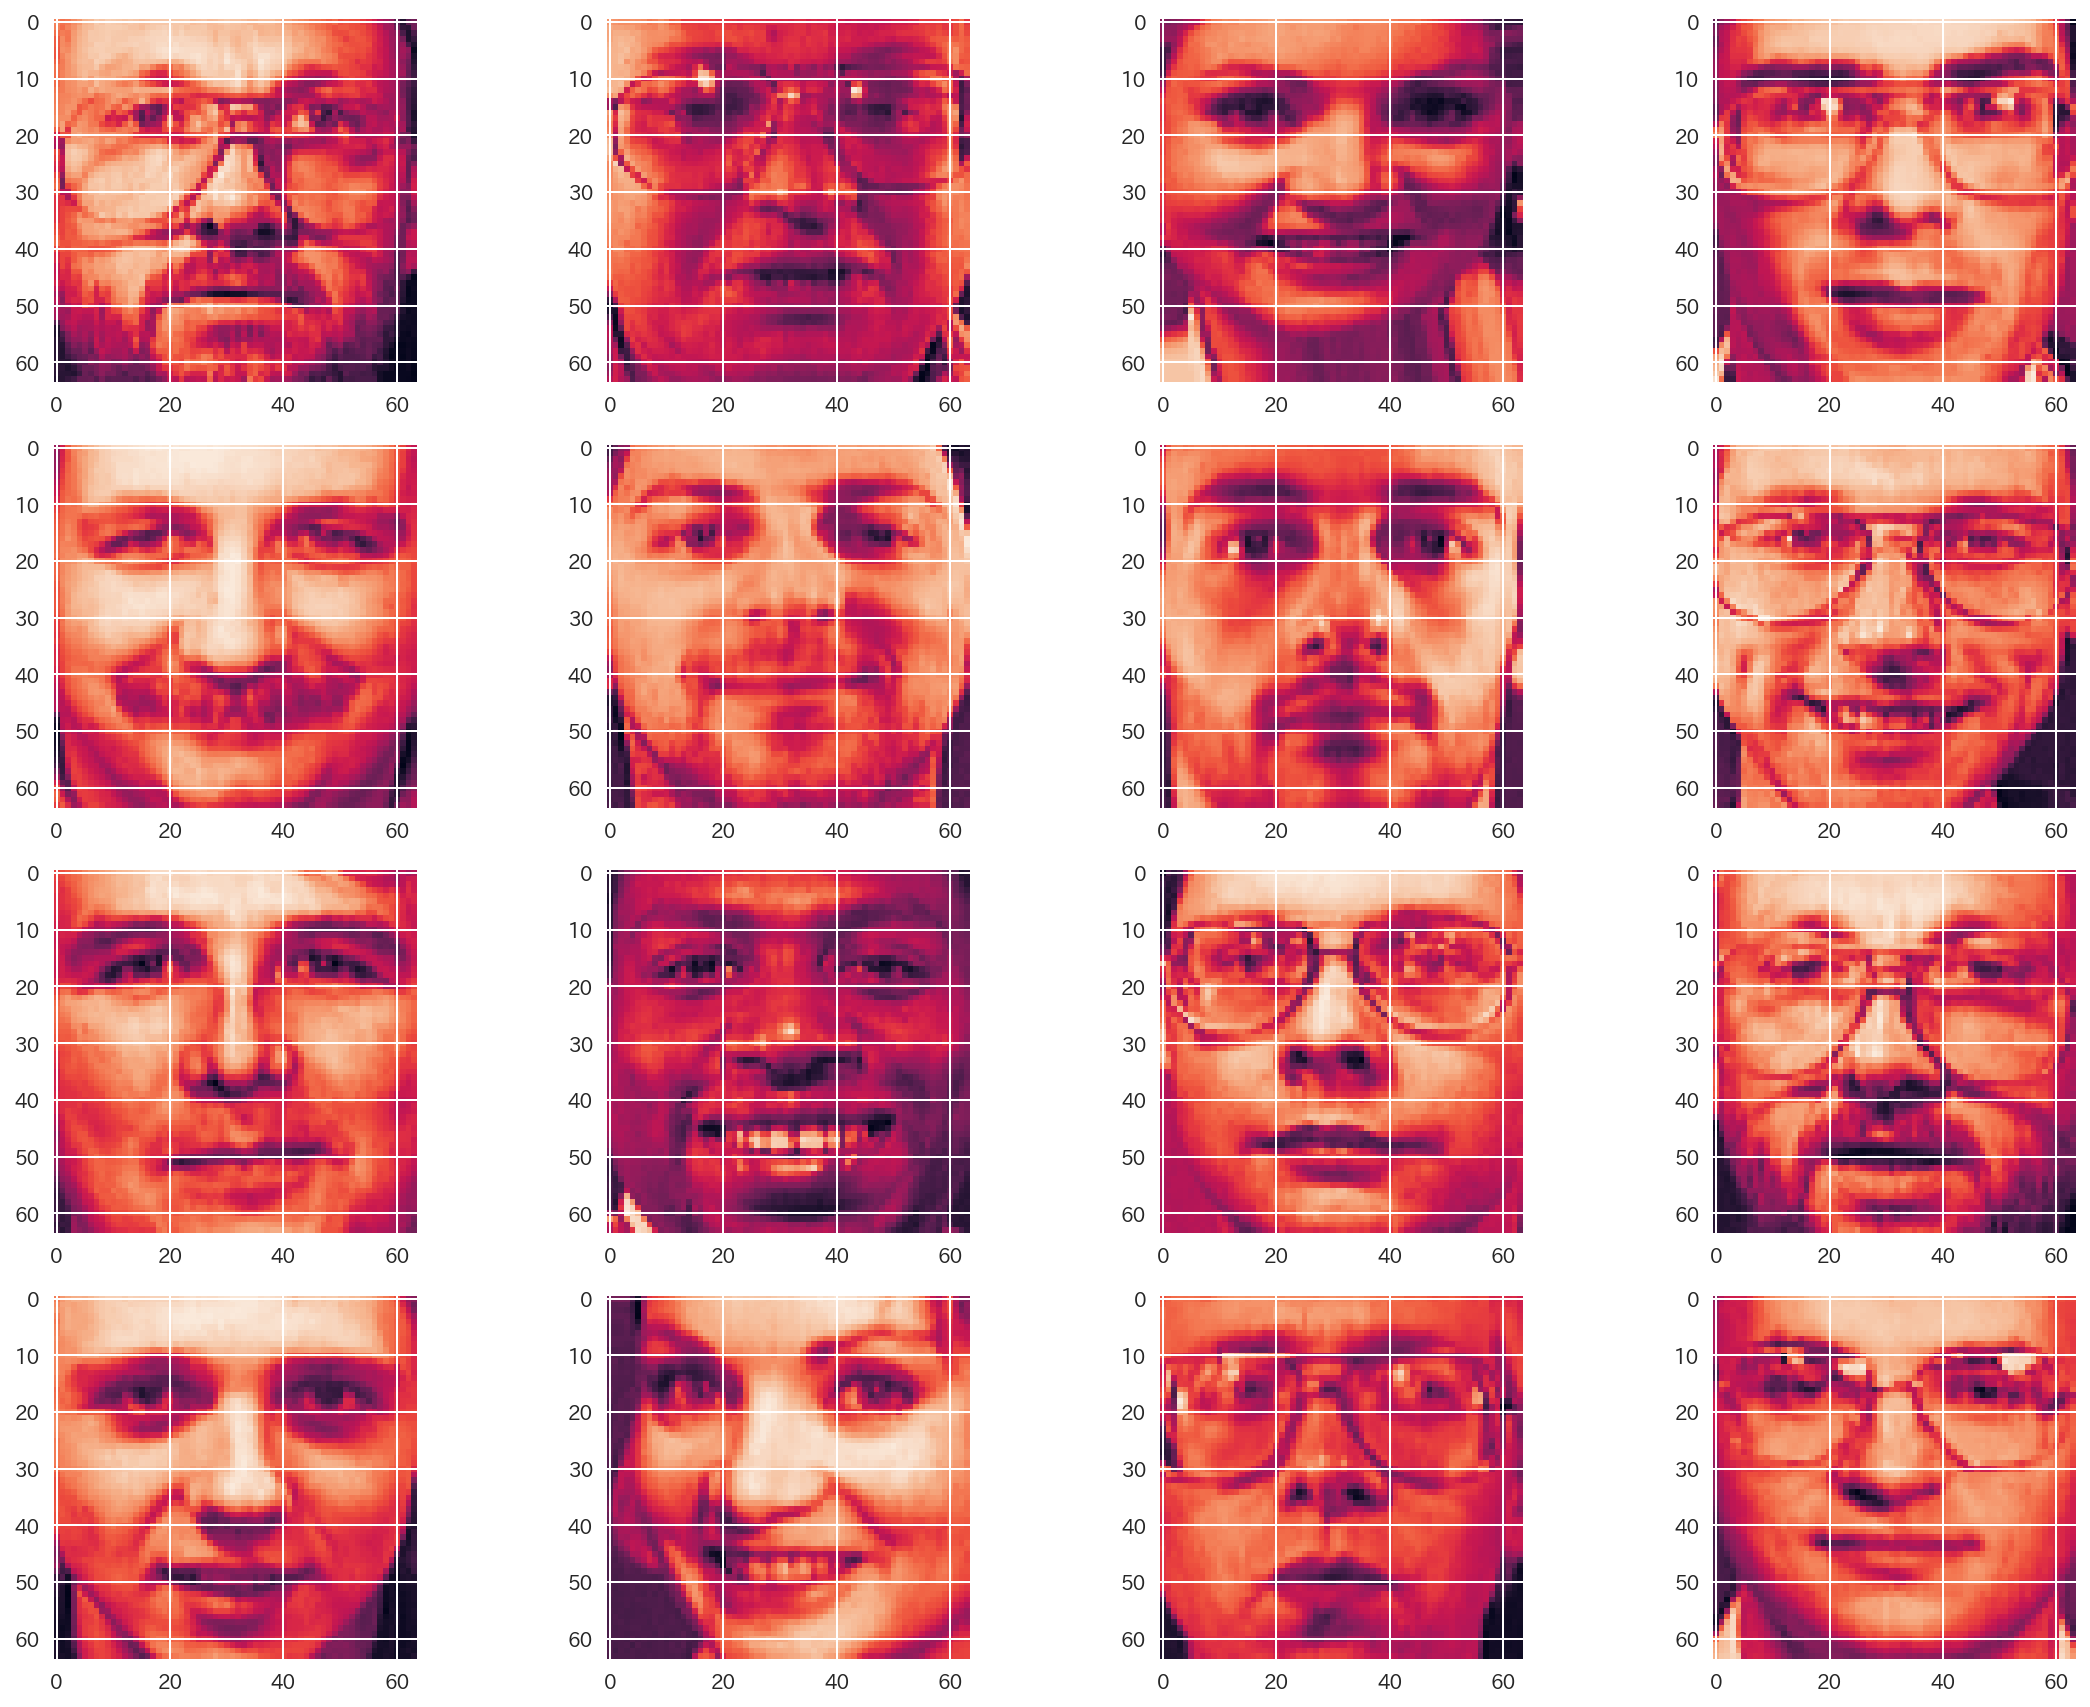

In [4]:
import math

faces = dataset.data
plt.figure(figsize=(16,12))

n_col = 4
num = 16
n_row = math.ceil(len(faces[:num]) / n_col)
image_shape = (64, 64)

for i, im in enumerate(faces[:num]):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

# 行列分解

In [5]:
# 下準備
n_train = int(len(faces) * 0.8)
X_train, X_test = faces[:n_train], faces[n_train:]

# 基底数
n_components=24

## PCA

[0.23870726 0.14735925 0.07878076 0.05120234 0.03570194 0.03012205
 0.02390525 0.02165351 0.01941589 0.01696473 0.01584495 0.01487441
 0.01245381 0.01177398 0.01080236 0.0102831  0.00882161 0.00834793
 0.00758101 0.00715689 0.00678986 0.00607909 0.00591328 0.00583675]
0.7963720252737403
CPU times: user 1.83 s, sys: 770 ms, total: 2.6 s
Wall time: 1.87 s


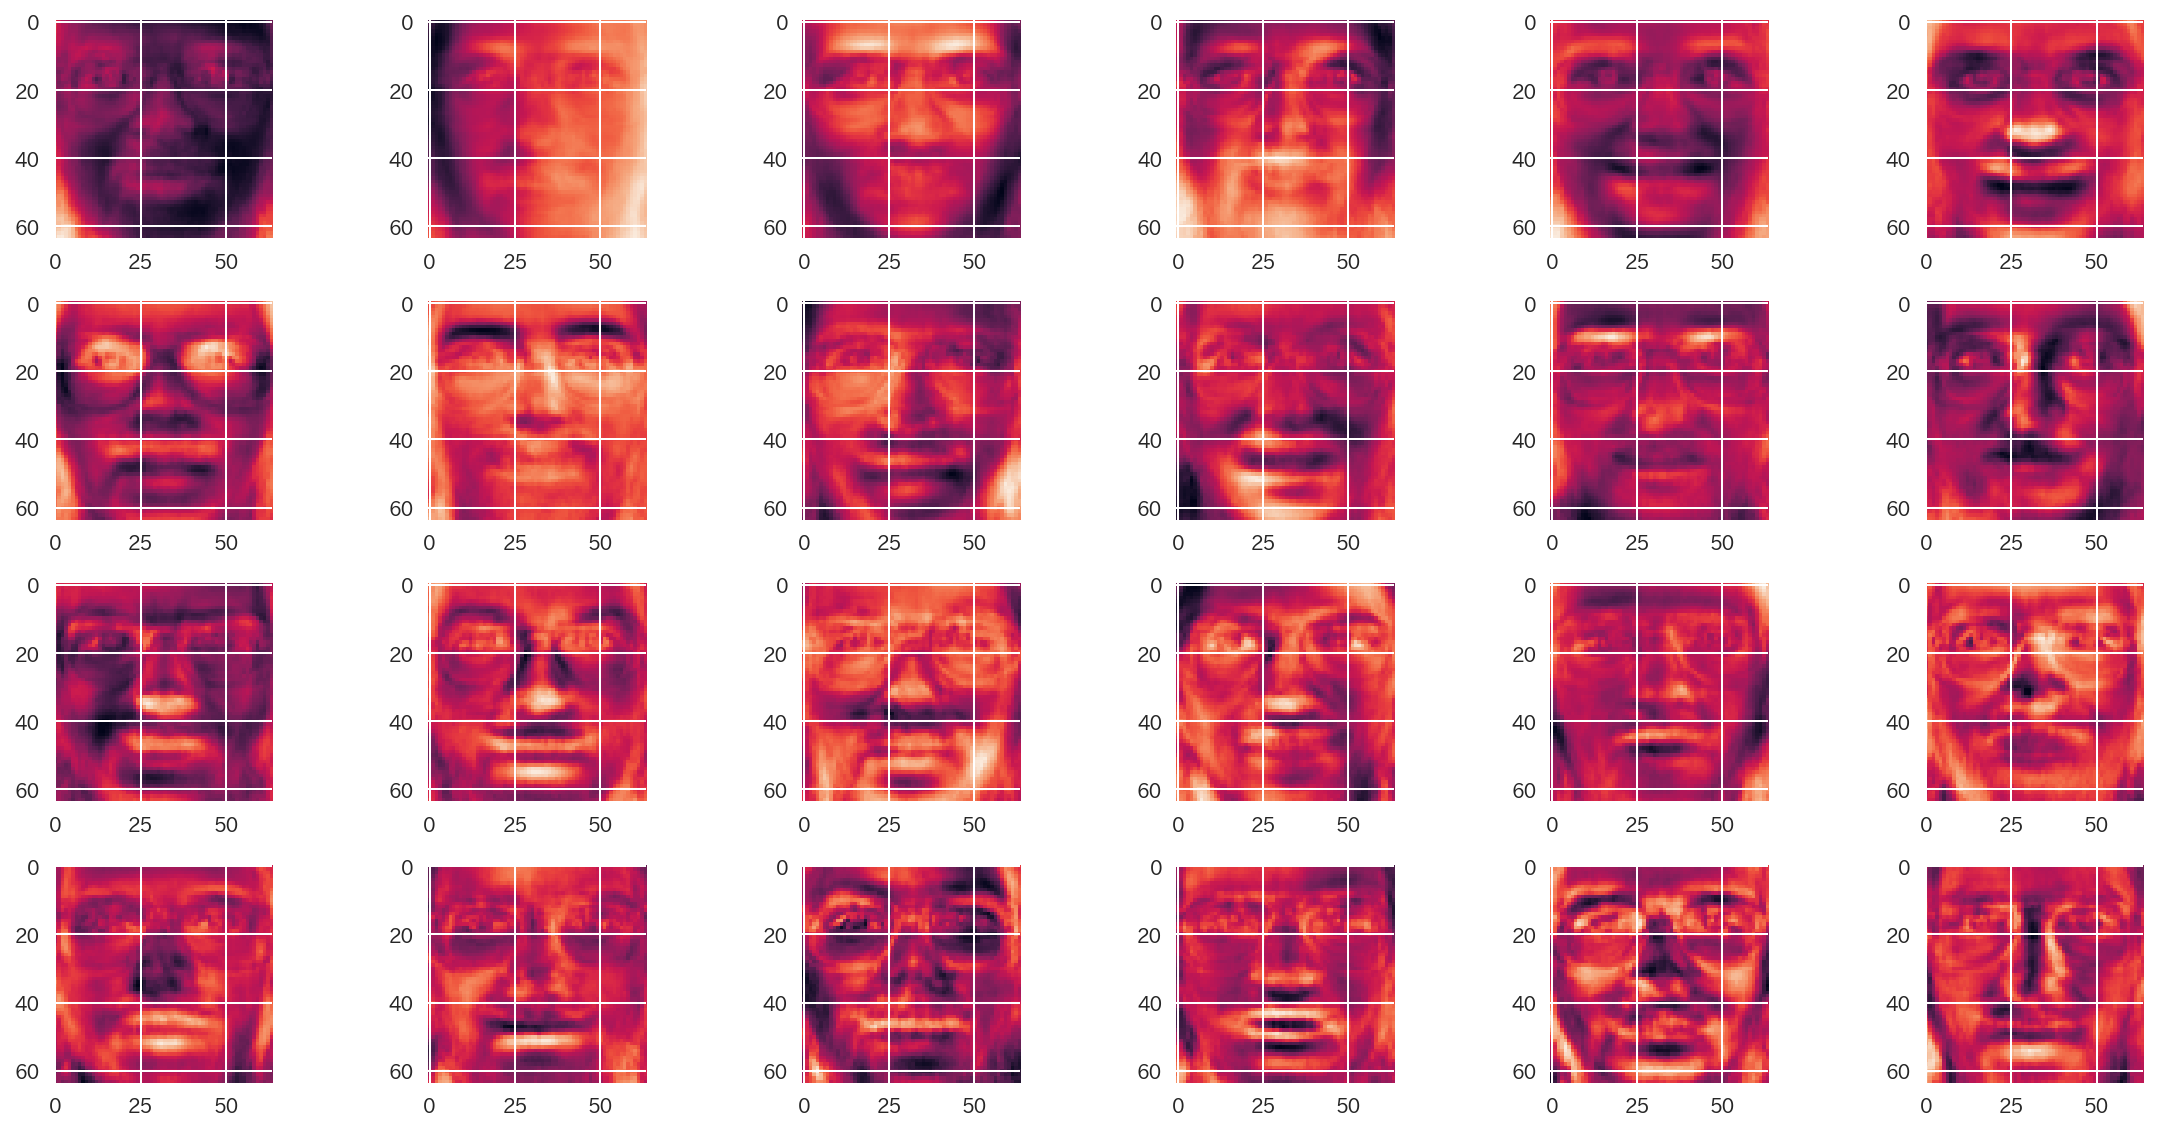

In [6]:
%%time

from sklearn.decomposition import PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)
print(f'{pca.explained_variance_ratio_}')
print(f'{sum(pca.explained_variance_ratio_)}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(pca.components_) / n_col)

# 基底の表示
for i, im in enumerate(pca.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

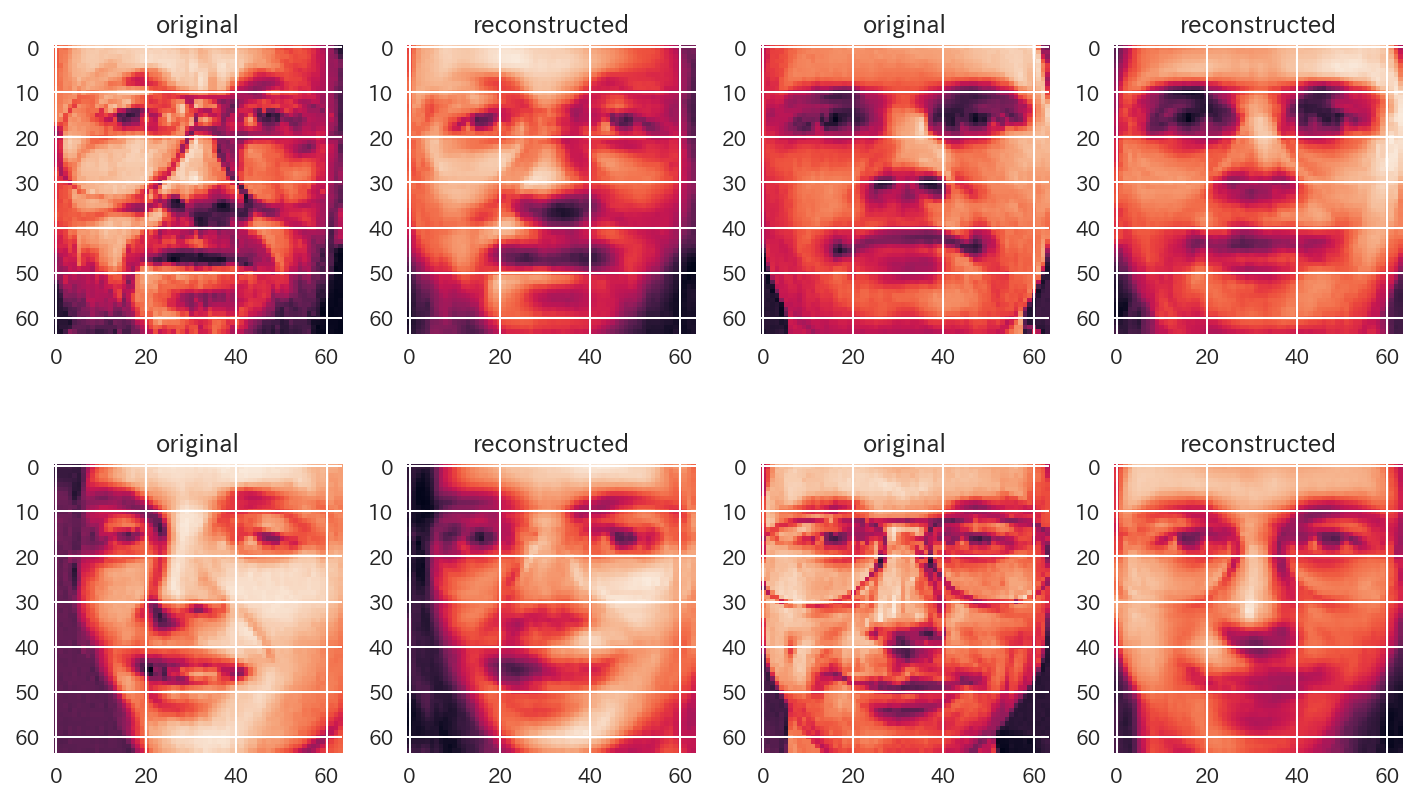

In [7]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = pca.transform(sample.reshape(1, -1))
    reconstructed = pca.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()

# ICA

CPU times: user 1.83 s, sys: 720 ms, total: 2.55 s
Wall time: 1.67 s


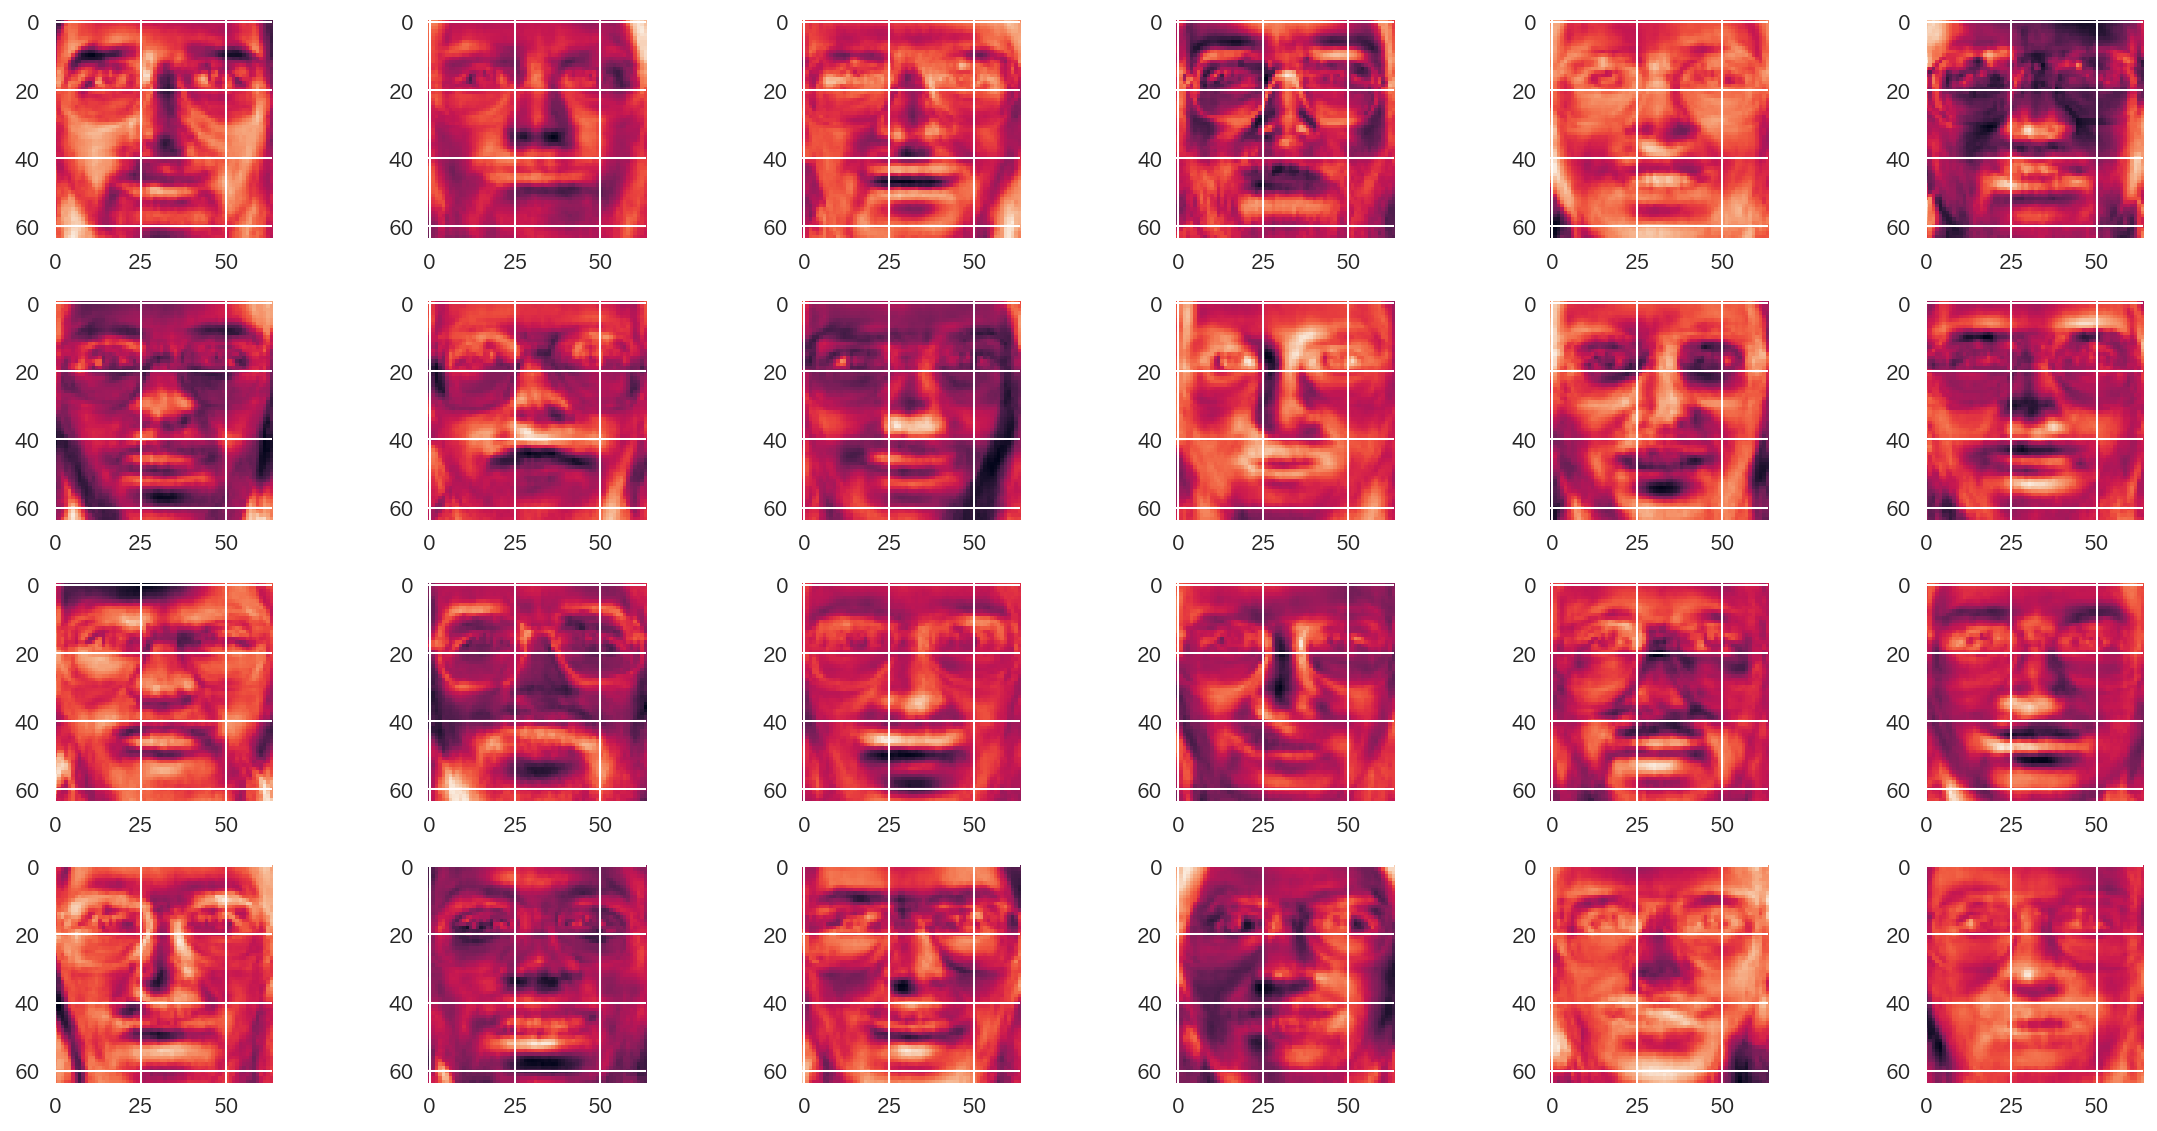

In [8]:
%%time

from sklearn.decomposition import FastICA
ica = FastICA(n_components=n_components, whiten=True)
ica.fit(X_train)
# print(f'{pca.explained_variance_ratio_}')
# print(f'{sum(pca.explained_variance_ratio_)}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(ica.components_) / n_col)

# 基底の表示
for i, im in enumerate(ica.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

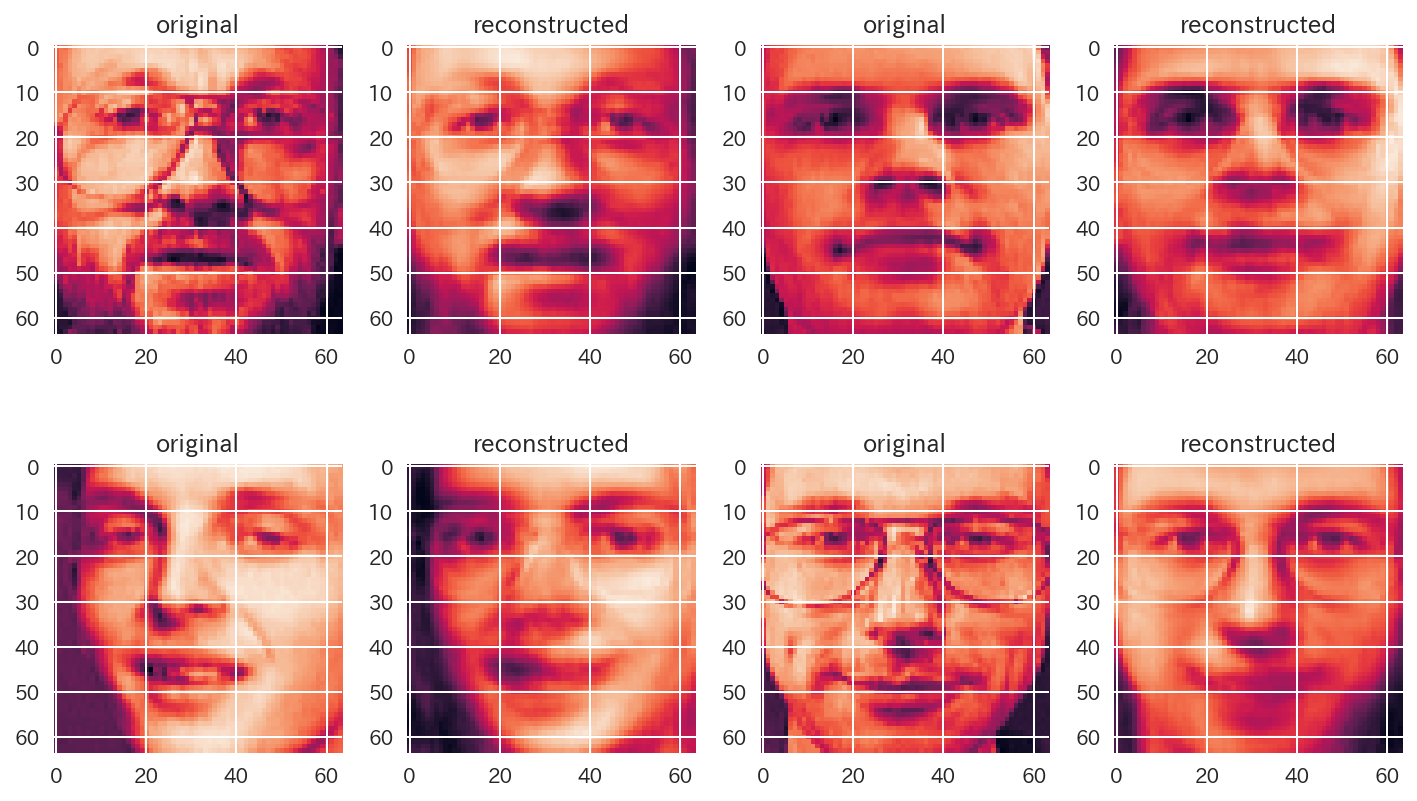

In [9]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = ica.transform(sample.reshape(1, -1))
    reconstructed = ica.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()

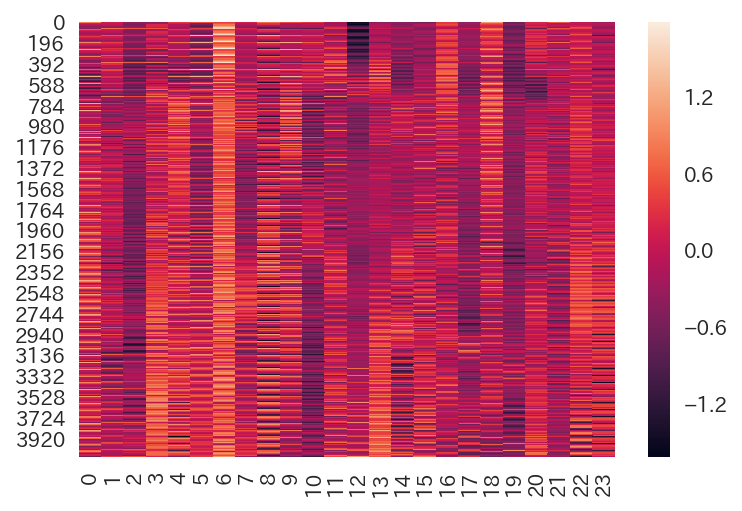

In [10]:
sns.heatmap(ica.mixing_)

## NMF

74.66518860623492
CPU times: user 6.79 s, sys: 2.44 s, total: 9.23 s
Wall time: 5.07 s


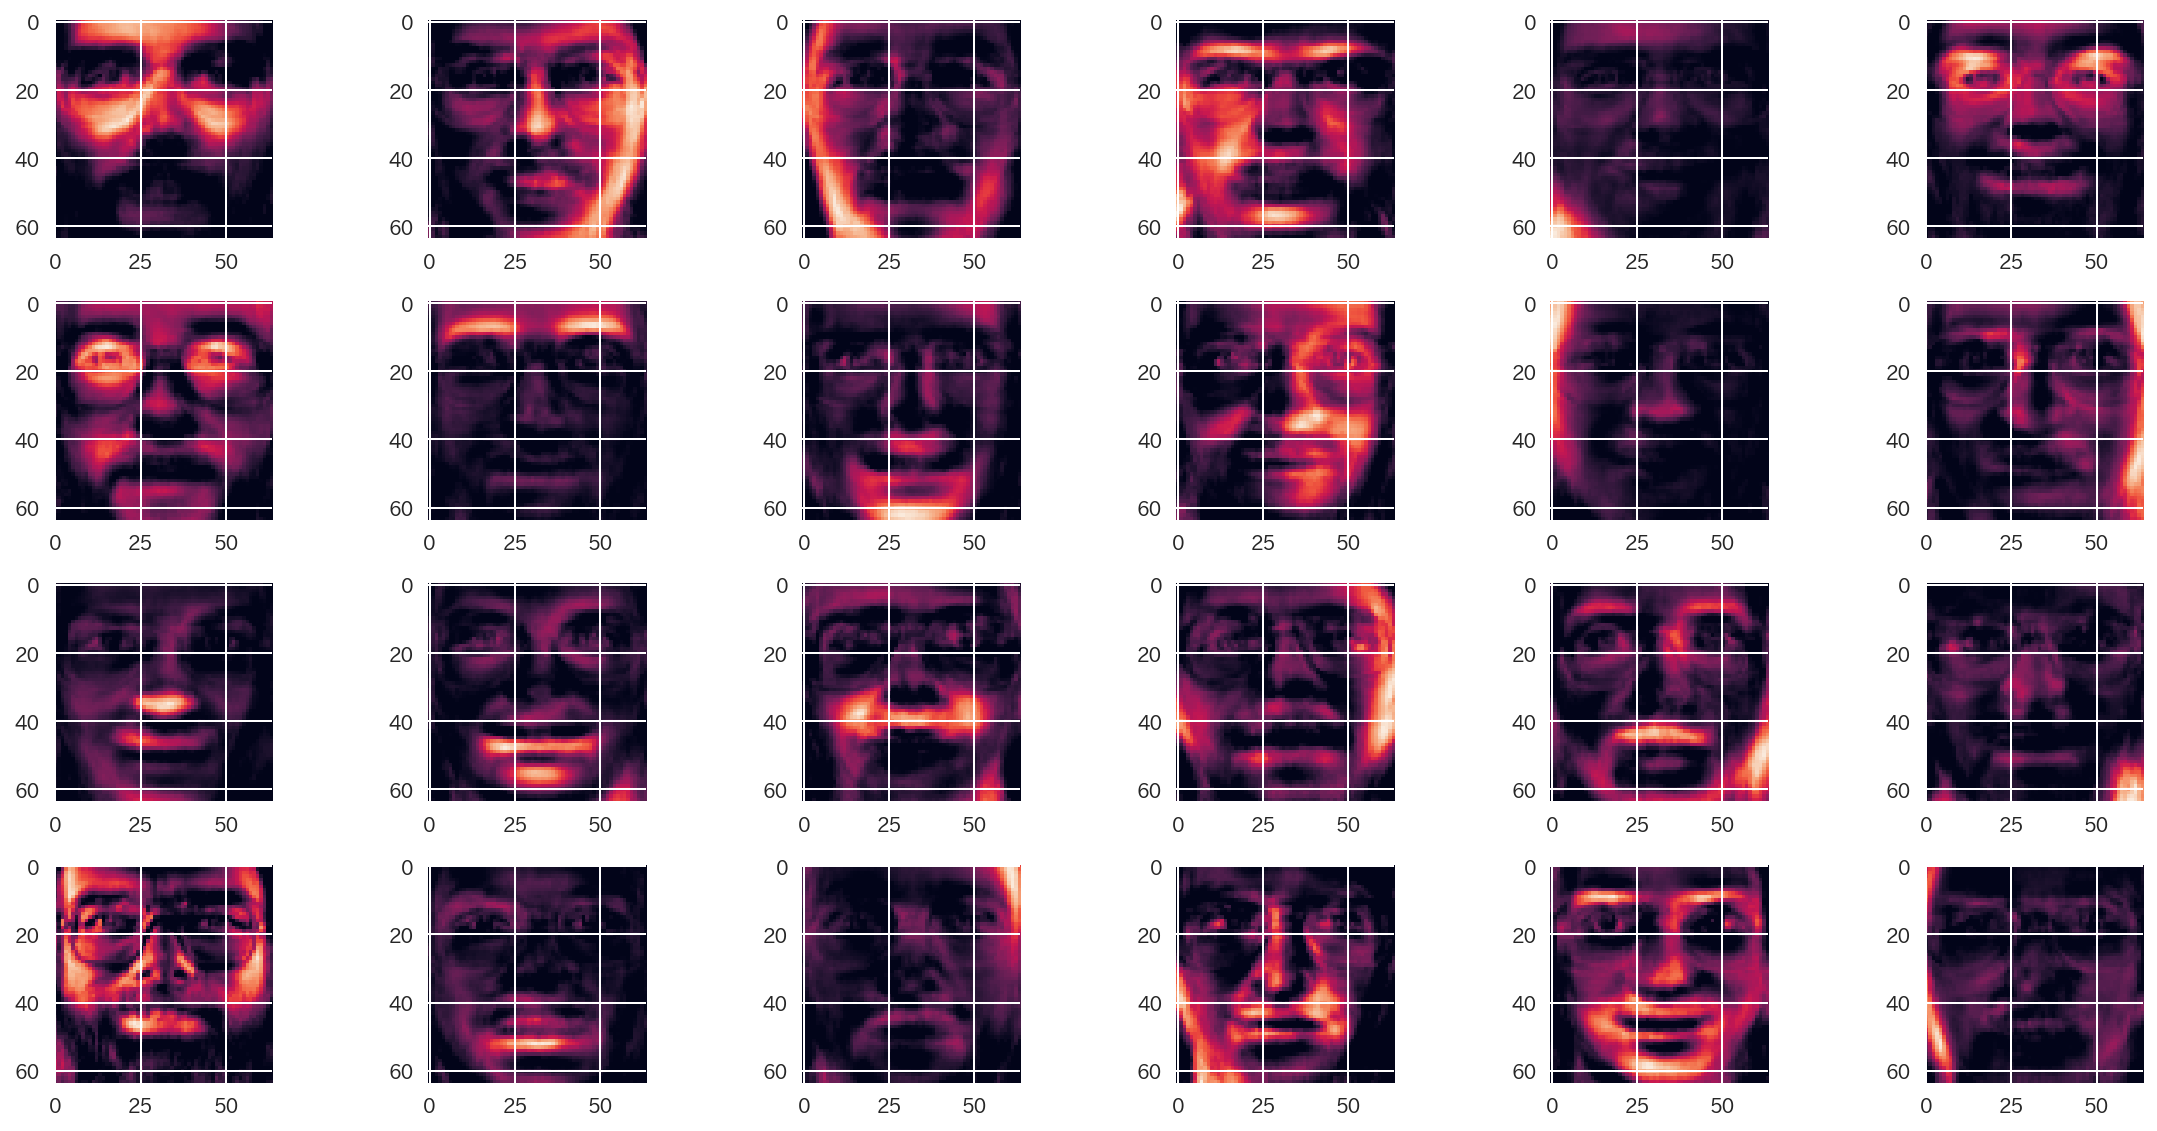

In [11]:
%%time
from sklearn.decomposition import NMF
nmf = NMF(n_components=n_components, max_iter=200)
W = nmf.fit_transform(X_train)
H = nmf.components_

print(f'{nmf.reconstruction_err_}')

plt.figure(figsize=(16,8))
n_col = 6
n_row = math.ceil(len(pca.components_) / n_col)

# 基底の表示
for i, im in enumerate(nmf.components_):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(im.reshape(image_shape))
    
plt.tight_layout()

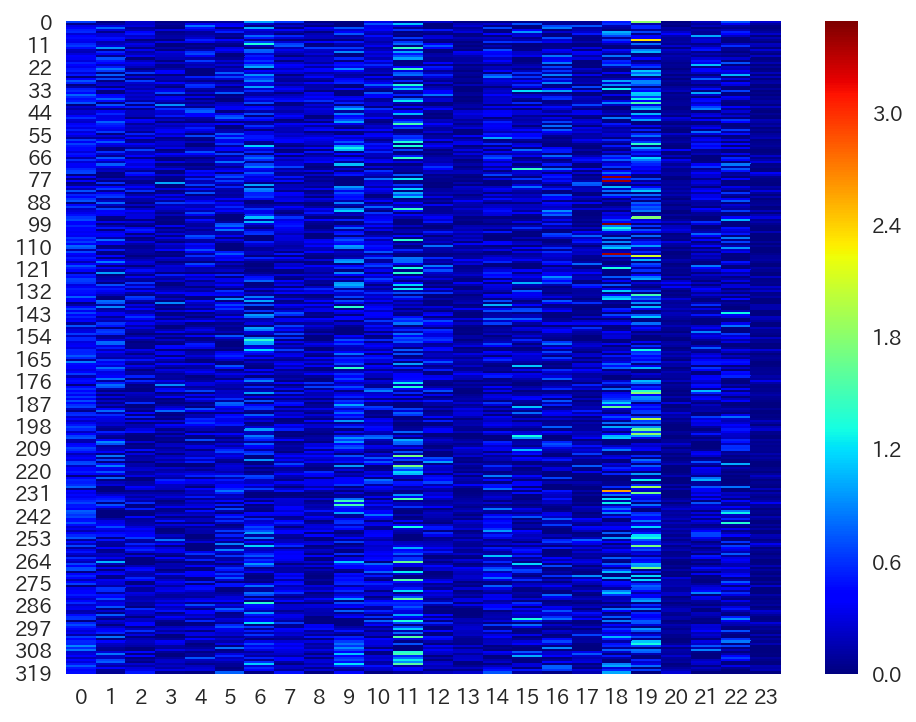

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(W, cmap='jet')

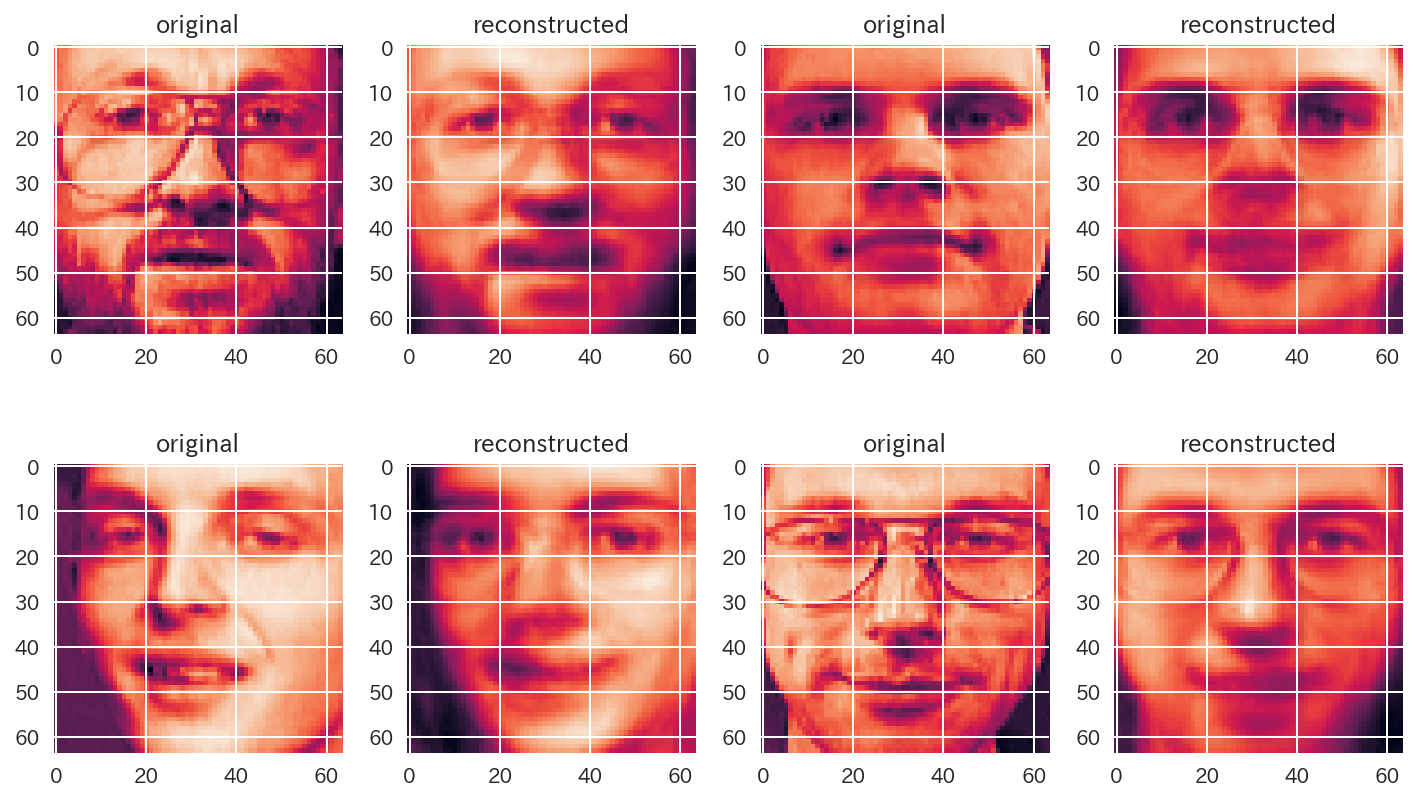

In [13]:

n_samples = 4
test_samples = X_test[:n_samples]

n_col = 4
n_row = int(n_samples * 2 / n_col)

plt.figure(figsize=(10,6))

for i, sample in enumerate(test_samples):
    plt.subplot(n_row, n_col, 2*i+1)
    plt.imshow(sample.reshape(image_shape))
    plt.title('original')    
    
    plt.subplot(n_row, n_col, 2*i+2) 
    code = nmf.transform(sample.reshape(1, -1))
    reconstructed = nmf.inverse_transform(code)
    plt.imshow(reconstructed.reshape(image_shape))
    plt.title('reconstructed')    

plt.tight_layout()